## 1.Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Import Model Building Libraries

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

### Image Preprocessing

In [2]:
from keras.preprocessing.image import ImageDataGenerator 

In [3]:
#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#3.Apply image data generator functionality to train and test images
train=train_datagen.flow_from_directory(r"C:\Users\dines\Documents\AI_ML\PROJECT\Weather dataset\training",
                                        target_size=(224,224),batch_size=16)
test=test_datagen.flow_from_directory(r"C:\Users\dines\Documents\AI_ML\PROJECT\Weather dataset\alien_test",
                                      target_size=(224,224),batch_size=16)


Found 1500 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [5]:
print(train.class_indices)

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}


### VGG 16

In [6]:
#import model building libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [7]:
conv_base=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))#hidden layers
model.add(Dense(units=5,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21138757 (80.64 MB)
Trainable params: 21138757 (80.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#let us freeze the conv_base because already trained
conv_base.trainable=False

In [13]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [15]:
model.fit(train,steps_per_epoch=len(train),epochs=10,validation_data=test,validation_steps=len(test))

Epoch 1/10
94/94 [==============================] - 249s 3s/step - loss: 0.0943 - accuracy: 0.9680 - val_loss: 0.2681 - val_accuracy: 0.9333
Epoch 2/10
94/94 [==============================] - 255s 3s/step - loss: 0.0717 - accuracy: 0.9780 - val_loss: 0.3111 - val_accuracy: 0.9000
Epoch 3/10
94/94 [==============================] - 267s 3s/step - loss: 0.0399 - accuracy: 0.9840 - val_loss: 0.0526 - val_accuracy: 0.9667
Epoch 4/10
94/94 [==============================] - 267s 3s/step - loss: 0.0879 - accuracy: 0.9640 - val_loss: 0.4652 - val_accuracy: 0.9000
Epoch 5/10
94/94 [==============================] - 264s 3s/step - loss: 0.0630 - accuracy: 0.9773 - val_loss: 0.1654 - val_accuracy: 0.9667
Epoch 6/10
94/94 [==============================] - 261s 3s/step - loss: 0.0409 - accuracy: 0.9860 - val_loss: 0.3730 - val_accuracy: 0.9333
Epoch 7/10
94/94 [==============================] - 254s 3s/step - loss: 0.0215 - accuracy: 0.9947 - val_loss: 0.2123 - val_accuracy: 0.9667
Epoch 8/10
94

In [18]:
model.save("weather.h5")

In [41]:
#checking model Accuracy
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics =['accuracy'])
loss, accuracy = model.evaluate(test)

2/2 [==============================] - 5s 2s/step - loss: 0.2170 - accuracy: 0.9667


### Testing the Model

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
import tensorflow as tf

In [21]:
model=tf.keras.models.load_model(r"C:\Users\dines\Documents\AI_ML\PROJECT\weather.h5",compile=False)

In [22]:
img=image.load_img(r"C:\Users\dines\Documents\AI_ML\PROJECT\Weather dataset\alien_test\rainy\rain_1.jpg",
                   target_size=(224,224))

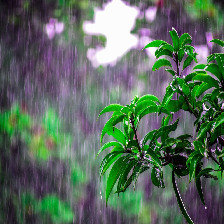

In [23]:
img

In [24]:
x=image.img_to_array(img)

In [25]:
x

array([[[19., 18., 23.],
        [10.,  9., 14.],
        [ 9.,  8., 13.],
        ...,
        [17., 12., 19.],
        [28., 21., 29.],
        [18., 11., 19.]],

       [[19., 18., 23.],
        [12., 11., 16.],
        [ 9.,  8., 13.],
        ...,
        [25., 20., 26.],
        [24., 19., 25.],
        [19., 12., 19.]],

       [[22., 21., 26.],
        [17., 16., 21.],
        [15., 14., 19.],
        ...,
        [30., 28., 33.],
        [22., 17., 23.],
        [16.,  9., 16.]],

       ...,

       [[49., 59., 50.],
        [48., 58., 49.],
        [44., 54., 46.],
        ...,
        [54., 43., 57.],
        [37., 27., 38.],
        [36., 25., 41.]],

       [[46., 56., 45.],
        [47., 54., 46.],
        [45., 51., 47.],
        ...,
        [49., 38., 52.],
        [35., 25., 36.],
        [38., 27., 43.]],

       [[42., 53., 39.],
        [45., 52., 44.],
        [44., 49., 45.],
        ...,
        [51., 40., 54.],
        [39., 29., 40.],
        [38., 27., 43.]]

In [26]:
x=np.expand_dims(x,axis=0) # changing the shape as input contain 4 dimensions

In [27]:
x.shape

(1, 224, 224, 3)

In [28]:
pred=model.predict(x)

1/1 [==============================] - 0s 325ms/step


In [29]:
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [30]:
pred.argmax()

2

In [31]:
Index=['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']

In [34]:
result=Index[pred.argmax()]
result

'rainy'